# Data Gathering and Processing: Occurrence Data
This phase focuses on acquiring and processing species occurrence data for *Rana temporaria* (Common Frog), *Bufo bufo* (Common Toad), and the three native newts present in Scotland: *Lissotriton helveticus* (Palmate Newt), *Lissotriton vulgaris* (Smooth Newt), and *Triturus cristatus* (Great Crested Newt). The goal is to obtain high-resolution or presence/absence data for use in habitat suitability modeling, ecological network analysis, and ultimately in developing recommendations for Blue-Green Infrastructure (BGI) opportunities that enhance amphibian connectivity.

## 1. Importance of Occurrence and Presence/Absence Data
### 1.1 Occurrence Data:

**Definition**: This data represents the locations where a particular species has been observed or recorded. It usually includes geographic coordinates, dates, and other associated metadata.

**Use in This Study**: Occurrence data is a primary input for building habitat suitability models using species distribution modeling (SDM) approaches. These models predict the suitability of areas within the study region based on environmental predictors (more on environmental predictors in LINK TO NOTEBOOK). Occurrence data is also used in spatial analyses to identify ecological corridors and areas with connectivity potential for the species in focus.

### 1.2 Presence/Absence Data:

**Definition**: Presence/absence data indicates whether a species is present or not at particular locations within a defined grid or area. Unlike occurrence data, it also explicitly captures areas where the species was not found, providing a more robust basis for certain statistical modelling approaches.

**Use in This Study:** This data helps refine models by providing negative data points (absence data), which can improve the reliability and accuracy of habitat suitability models. Presence/absence data can aid in assessing the effectiveness of existing ecological networks and identifying areas that need enhancement or restoration through BGI.

## 2. Species Occurrence Retrieval
For this study, the primary data source is the Global Biodiversity Information Facility (GBIF), a widely used open-access database for biodiversity data, including species occurrence records. Additional potential sources include:

* NBN Atlas (UK-based biodiversity data)
* Scottish Herpetology Atlas or any regional databases specific to amphibians
* Local Environmental Records Centres (LERCs): These can provide region-specific data that may not be captured in larger databases.
* Citizen Science Projects: Platforms such as iNaturalist may supplement occurrence data with public contributions.

Using APIs (e.g., `pygbif` for accessing GBIF) to query and retrieve occurrence records for each target species.
Extracting data that falls within the boundaries of the study area using spatial filtering.

### 2.1 Importing Required Libraries
Let's begin by importing essential libraries for data retrieval and geospatial analysis.

In [1]:
import pygbif  # For retrieving GBIF data
from pygbif import occurrences
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

INFO:NumExpr defaulting to 8 threads.


In the code above: 
* `pygbif` allows querying the Global Biodiversity Information Facility (GBIF) for species occurrence data.
* `pandas` is used for data manipulation and processing.
* `geopandas` facilitates geospatial operations, such as loading and filtering data based on a shapefile.

### 2.2 Loading the Study Area Shapefile
The study area shapefile helps spatially filter occurrences to ensure data relevance to the study region.

In [2]:
# Load study area shapefile
study_area = gpd.read_file('C:/GIS_Course/MScThesis-MaviSantarelli/data/StudyArea/Study_Area.shp')

# Ensure the Coordinate Reference System (CRS) is compatible (EPSG:4326 for latitude/longitude)
study_area = study_area.to_crs('EPSG:4326')
# Get bounding box coordinates (minx, miny, maxx, maxy)
minx, miny, maxx, maxy = study_area.total_bounds
print (study_area.total_bounds)

[-5.18742208 54.86206445 -2.20955055 56.48171437]


Explanation:

* The study area defines the geographic boundaries for filtering occurrence records.
* Using an appropriate `CRS` (coordinate reference system) ensures consistency during spatial operations.
* We are getting the `bounding box` defined by the minimum and maximum latitude/longitude values of our study area to use in the database query. 
  
### 2.3 Querying Species Occurrence Data from GBIF
   
We use `pygbif` to retrieve occurrence data for the target species:

In [3]:
# Create a WKT string representing a bounding box
geometry_filter = f"POLYGON(({minx} {miny}, {minx} {maxy}, {maxx} {maxy}, {maxx} {miny}, {minx} {miny}))"

# Define species of interest, including the Alpine Newt
species_list = [
    'Rana temporaria', 
    'Bufo bufo', 
    'Lissotriton helveticus', 
    'Lissotriton vulgaris', 
    'Triturus cristatus', 
    'Ichthyosaura alpestris'  # Alpine Newt
]
occurrences_data = []  # List to store occurrence records

for species in species_list:
    response = occurrences.search(
        scientificName=species,
        limit=10000,  # Set a limit for the number of records retrieved
        year='2020,2024',  # Filter for occurrences from 2020 to 2024
        geometry=geometry_filter  # Apply spatial filter as a bounding box
    )
    occurrences_data.extend(response['results'])

# Convert to a DataFrame for easier processing
df = pd.DataFrame(occurrences_data)
print(len(df))

1202


This code block retrieves and organizes species occurrence data for specific amphibian species within a specified geographic region and time frame.

#### Summary of Functionality:
* **Spatial Filtering**: A `bounding box` is defined using the coordinates of your study area and represented as a Well-Known Text (WKT) polygon string. This restricts the data retrieval to occurrences within this defined area.
* **Species Filtering**: The code targets occurrences for six amphibian species: *Rana temporaria* (Common Frog), *Bufo bufo* (Common Toad), *Lissotriton helveticus* (Palmate Newt), *Lissotriton vulgaris* (Smooth Newt), *Triturus cristatus* (Great Crested Newt) and the invasive *Ichthyosaura alpestris* (Alpine Newt).
* **Time Filtering**: Only data from the years 2020 to 2024 is retrieved.
* **Data Retrieval**: The code uses the `pygbif` library to query the Global Biodiversity Information Facility (GBIF) for up to 10,000 records per species that match these filters.
* **Data Processing**: The retrieved occurrence data is then stored in a list, which is converted into a `Pandas DataFrame` for further analysis or processing.

Before we proceed with data cleaning, it would be useful to look as some quick statics.

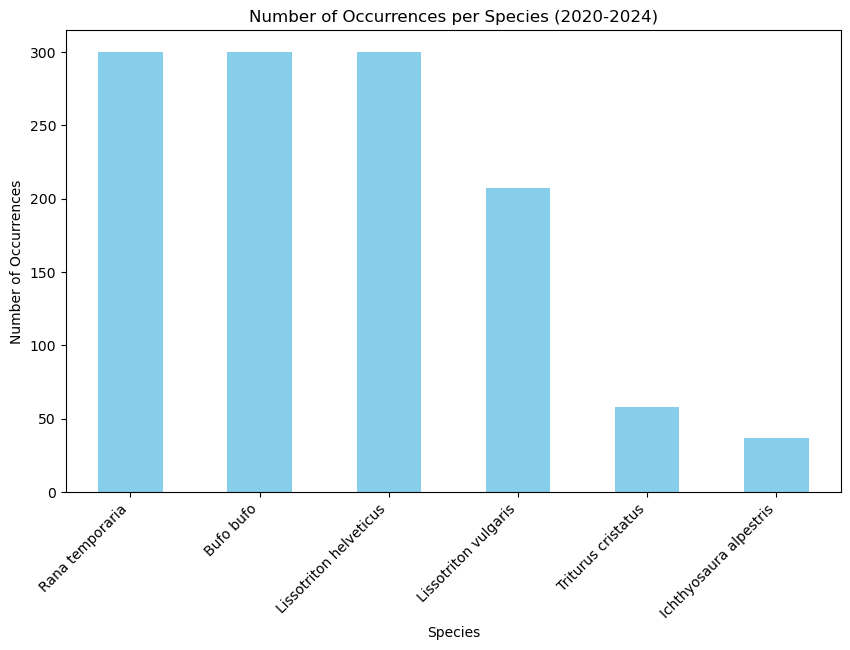

In [4]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each species in the DataFrame
species_counts = df['species'].value_counts()

# Plot the data as a bar chart
plt.figure(figsize=(10, 6))
species_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Occurrences per Species (2020-2024)')
plt.xlabel('Species')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.show()

## 3. Considerations on Data Quality and Resolution

### 3.1 Data Quality Considerations:

**Coordinate Precision and Accuracy**: Occurrence records may vary in their coordinate precision. High-resolution data will have accurate and precise coordinates, while lower-quality data may have high coordinate uncertainty, making them less reliable for spatial analysis.

**Temporal Consistency**: Data should be filtered to include recent records (e.g., occurrences from 2020-2024) to ensure relevance to current habitat conditions (already done in previous stage).

**Data Completeness**: Presence/absence data can be supplemented by occurrence data through systematic sampling or modelling techniques, depending on the availability of true absence data.

**Data Sources and Verification**: Priority is given to verified and well-documented data sources such as GBIF. Records with high uncertainty or unverified sources may be excluded or flagged.

### 3.2 Understanding High-Resolution Data:

**Definition**: High-resolution data refers to records with precise spatial coordinates and minimal uncertainty, allowing for detailed spatial modelling.

**Application**: In habitat suitability modelling, high-resolution data leads to finer-scale predictions of habitat use and better identification of ecological barriers and corridors.

### 3.3 Checking Precision of Coordinates

To ensure high resolution throughout the dataset, we can check how many decimal places each coordinate has, which will indicate the resolution of the data. Ideally, we want to check if the coordinates are consistently using the same precision.

This can be done by inspecting a few records and checking the number of decimal places for `decimalLatitude` and `decimalLongitude`:

In [5]:
df['lat_precision'] = df['decimalLatitude'].apply(lambda x: len(str(x).split('.')[1]) if pd.notna(x) else 0)
df['lon_precision'] = df['decimalLongitude'].apply(lambda x: len(str(x).split('.')[1]) if pd.notna(x) else 0)

# Check unique values for precision
print(df['lat_precision'].unique())
print(df['lon_precision'].unique())

[5 6 4 3 1]
[5 6 4 3]


The results [5, 6, 4, 3, 1] for latitude precision and [5, 6, 4, 3] for longitude precision indicate that our data has varying levels of precision across different records. Specifically:

* **Latitude Precision** varies between data with 1 to 6 decimal places.
* **Longitude Precision** varies between data with 3 to 6 decimal places.
  
#### What This Means:
1. **Varying Precision**: Some coordinates are rounded to 1 decimal place (which could be very imprecise for spatial analysis), while others are more precise (6 decimal places).
2. **Impact on Analysis**: The data with lower precision (fewer decimal places) could lead to less accurate spatial analysis, as those coordinates are less specific.

### 3.4 Remove Low-Precision Data
We can remove records with less than 4 decimal places (corresponding to 10m resolution) to ensure that the records have high enough resolution. 

In [6]:
df = df[df['lat_precision'] >= 4]
df = df[df['lon_precision'] >= 4]
print(len(df))

1192


We can see that a total of 10 (the original 1202 minus the resulting 1192) records got deleted as they had a resolution lower than 10m. 

## 4. Spatially Checking the Records

### 4.1 Visualising the Records
We can now visualise the records to check that they are spatially consistent:


In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create geometries from the latitude and longitude
df['geometry'] = df.apply(lambda row: Point(row['decimalLongitude'], row['decimalLatitude']), axis=1)

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Set the CRS (Coordinate Reference System) to EPSG:4326 (WGS 84)
gdf.set_crs('EPSG:4326', inplace=True)

,key,datasetKey,publishingOrgKey,installationKey,hostingOrganizationKey,publishingCountry,protocol,lastCrawled,lastParsed,crawlId,...,habitat,eventType,identificationRemarks,organismQuantity,organismRemarks,behavior,georeferenceVerificationStatus,lat_precision,lon_precision,geometry
0,4900356870,ce19985f-1b12-49c7-8859-8d664ef4a5b7,2884418b-373a-408d-8deb-d4fb7eb8aed6,99552c70-f762-11e1-a439-00145eb45e9a,07f617d0-c688-11d8-bf62-b8a03c50a862,GB,DWC_ARCHIVE,2024-11-14T09:04:43.971+00:00,2024-11-14T09:06:57.833+00:00,341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,POINT (-4.49703 55.93262)
1,4900356428,ce19985f-1b12-49c7-8859-8d664ef4a5b7,2884418b-373a-408d-8deb-d4fb7eb8aed6,99552c70-f762-11e1-a439-00145eb45e9a,07f617d0-c688-11d8-bf62-b8a03c50a862,GB,DWC_ARCHIVE,2024-11-14T09:04:43.971+00:00,2024-11-14T09:06:57.703+00:00,341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,POINT (-4.58219 56.01163)
2,4900356815,ce19985f-1b12-49c7-8859-8d664ef4a5b7,2884418b-373a-408d-8deb-d4fb7eb8aed6,99552c70-f762-11e1-a439-00145eb45e9a,07f617d0-c688-11d8-bf62-b8a03c50a862,GB,DWC_ARCHIVE,2024-11-14T09:04:43.971+00:00,2024-11-14T09:06:58.180+00:00,341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,POINT (-4.56225 56.00771)
3,4867366492,583be0a0-006e-47af-82c2-d6e7d44b78c4,d4b5490a-3267-4e96-94b3-9b93ea167051,99552c70-f762-11e1-a439-00145eb45e9a,07f617d0-c688-11d8-bf62-b8a03c50a862,GB,DWC_ARCHIVE,2024-11-16T21:03:30.223+00:00,2024-11-16T21:05:08.167+00:00,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,POINT (-3.27479 55.94338)
4,4522812873,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,GB,DWC_ARCHIVE,2024-11-17T09:49:24.302+00:00,2024-11-19T02:33:58.117+00:00,499,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,POINT (-2.61708 54.90011)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,3056596617,4575bf91-0c65-47a8-84cb-0b36111f8956,3ce82624-d07f-4a56-88c8-a903321a90fc,99552c70-f762-11e1-a439-00145eb45e9a,07f617d0-c688-11d8-bf62-b8a03c50a862,GB,DWC_ARCHIVE,2024-10-23T22:14:45.471+00:00,2024-10-23T22:15:52.278+00:00,257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,POINT (-3.18731 55.96800)
1198,3465789333,fd885591-9626-422d-ac3f-64f1ee347eca,3ce82624-d07f-4a56-88c8-a903321a90fc,99552c70-f762-11e1-a439-00145eb45e9a,07f617d0-c688-11d8-bf62-b8a03c50a862,GB,DWC_ARCHIVE,2024-11-13T09:48:45.486+00:00,2024-11-13T09:49:28.753+00:00,137,...,NaN,NaN,NaN,NaN,NaN,NaN,Accepted,6,6,POINT (-3.28000 55.94294)
1199,3056596473,4575bf91-0c65-47a8-84cb-0b36111f8956,3ce82624-d07f-4a56-88c8-a903321a90fc,99552c70-f762-11e1-a439-00145eb45e9a,07f617d0-c688-11d8-bf62-b8a03c50a862,GB,DWC_ARCHIVE,2024-10-23T22:14:45.471+00:00,2024-10-23T22:15:52.169+00:00,257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,POINT (-3.29725 55.94105)
1200,4462935701,583be0a0-006e-47af-82c2-d6e7d44b78c4,d4b5490a-3267-4e96-94b3-9b93ea167051,99552c70-f762-11e1-a439-00145eb45e9a,07f617d0-c688-11d8-bf62-b8a03c50a862,GB,DWC_ARCHIVE,2024-11-16T21:03:30.223+00:00,2024-11-16T21:05:28.595+00:00,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,POINT (-3.16406 55.93882)


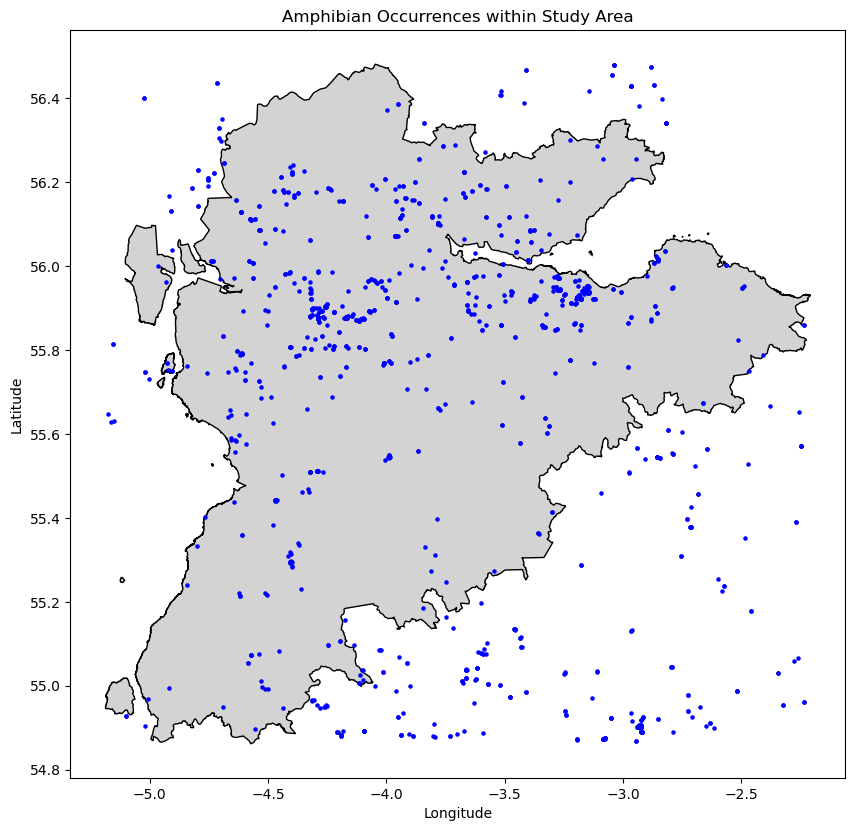

In [9]:
# Plot the study area first
ax = study_area.plot(color='lightgrey', edgecolor='black', figsize=(10, 10))

# Plot the occurrence data on top
gdf.plot(ax=ax, marker='o', color='blue', markersize=5)

# Optional: add title and labels
plt.title("Amphibian Occurrences within Study Area")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

### 4.2 Spatially Filtering the Records

From the map above, we can see that despite the data being consistently distributed within the country boundaries, some of the data appears outside the study area. This is because when we filtered for the study area during the dataset retrieval phase, we were only able to filter by the study area bounding box. First, let's find out how many records are falling ouside the study area:

In [12]:
gdf['within_study_area'] = gdf.geometry.intersects(study_area.unary_union)

# Count occurrences outside the study area (where within_study_area is False)
outside_count = len(gdf[gdf['within_study_area'] == False])

# Display the count of occurrences outside the study area
print(f"Number of occurrences outside the study area: {outside_count}")

Number of occurrences outside the study area: 377


After verifying how many records are laying outside the area of interest, we can proceeed by deleting the latter from the dataset. The code below also visualises the dataset one more time to check that this process ran without issues.

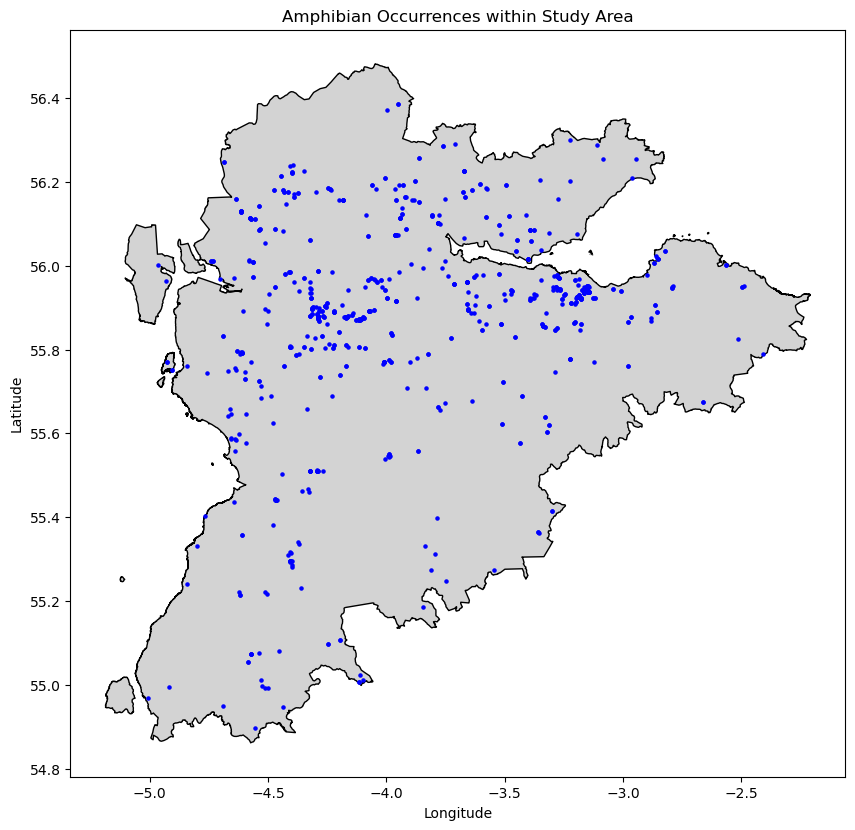

Remaining occurrences within the study area: 815


In [13]:
# Now filter out the occurrences that are outside the study area
gdf_filtered = gdf[gdf['within_study_area'] == True]

# Plot the filtered data on the map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the study area
study_area.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plot the filtered occurrence data points
gdf_filtered.plot(ax=ax, marker='o', color='blue', markersize=5)

# Optional: add title and labels
plt.title("Amphibian Occurrences within Study Area")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()

# Print how many records remain after filtering
print(f"Remaining occurrences within the study area: {len(gdf_filtered)}")

Let's check again the distribution of records per species:

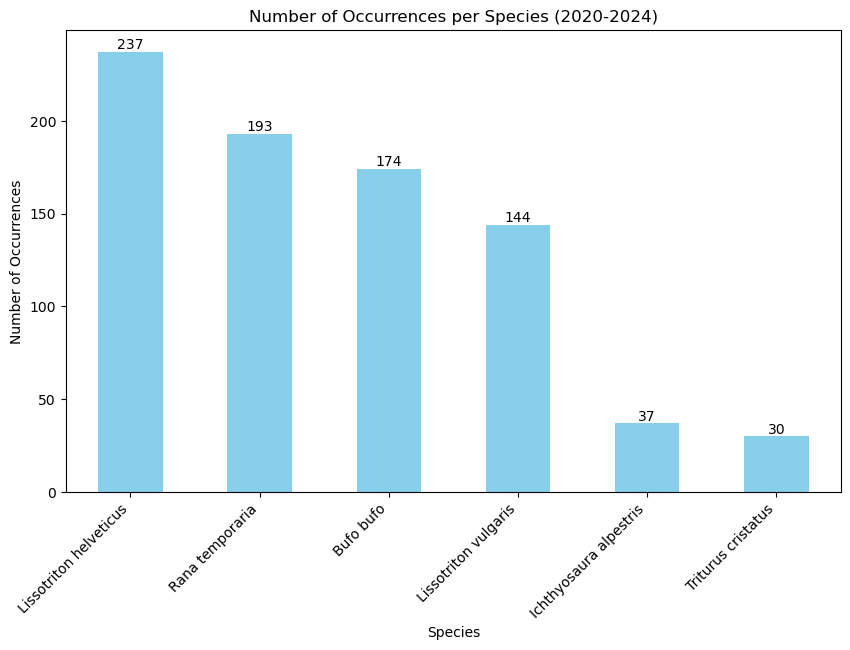

In [16]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each species in the DataFrame
species_counts = gdf_filtered['species'].value_counts()

# Plot the data as a bar chart
plt.figure(figsize=(10, 6))
ax = species_counts.plot(kind='bar', color='skyblue')

# Add the count labels on top of the bars
for i, count in enumerate(species_counts):
    ax.text(i, count + 0.05, str(count), ha='center', va='bottom', fontsize=10)

# Set chart title and labels
plt.title('Number of Occurrences per Species (2020-2024)')
plt.xlabel('Species')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

______________________
___________________

This part is just saving the dataset created so far.

In [37]:
bufo_bufo = gdf_filtered[gdf_filtered['species'] == 'Bufo bufo']
rana_temporaria = gdf_filtered[gdf_filtered['species'] == 'Rana temporaria']
lissotriton_helveticus = gdf_filtered[gdf_filtered['species'] == 'Lissotriton helveticus']
print(len(bufo_bufo))
print(len(common_frog))
print(len(lissotriton_helveticus))

174
193
237


In [39]:
bufo_bufo.to_file('C:/GIS_Course/MScThesis-MaviSantarelli/data/OccurrenceData/BufoBufo/bufobufo.shp')  # Replace with your file path
common_frog.to_file('C:/GIS_Course/MScThesis-MaviSantarelli/data/OccurrenceData/RanaTemporaria/ranatemporaria.shp')  # Replace with your file path
lissotriton_helveticus.to_file('C:/GIS_Course/MScThesis-MaviSantarelli/data/OccurrenceData/LissotritonHelveticus/lissotritonhelveticus.shp')  # Replace with your file path

This part just saved the dataset created so far.
____________________________________
_________________

## 5. Generating Pseudo-Absence Data
In ecological studies, species distribution models often rely on the concept of presence and absence data to predict suitable habitats across a landscape. While presence data is collected from field surveys or other sources, absence data is not directly observed and must be generated. This is particularly challenging when dealing with species that have limited or unknown presence in certain areas.

**Pseudo-absence** data refers to artificially generated absence data for locations where the species is not observed. These data points are crucial for creating a balanced model, as the presence of a species in a given area is not always equal to the absence. Generating pseudo-absences involves sampling locations where the species is unlikely to be present based on its habitat preferences or other ecological considerations.

In [40]:
import geopandas as gpd
import numpy as np
import random

# Load the species data and study area shapefile
bufo_bufo = gpd.read_file('C:/GIS_Course/MScThesis-MaviSantarelli/data/OccurrenceData/BufoBufo/bufobufo.shp')
rana_temporaria = gpd.read_file('C:/GIS_Course/MScThesis-MaviSantarelli/data/OccurrenceData/RanaTemporaria/ranatemporaria.shp')
lissotriton_helveticus = gpd.read_file('C:/GIS_Course/MScThesis-MaviSantarelli/data/OccurrenceData/LissotritonHelveticus/lissotritonhelveticus.shp')
study_area = gpd.read_file('C:/GIS_Course/MScThesis-MaviSantarelli/data/StudyArea/Study_Area.shp')  # Your study area shapefile